# KNeighbours Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Sketchjar/Datasets/master/Classified%20Data'

In [3]:
df = pd.read_csv(url,sep=',')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X_feat = sc.fit_transform(X)

In [11]:
from sklearn.cross_validation import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(confusion_matrix(y_test,y_pred))

[[99  7]
 [ 9 85]]


In [20]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93       106
          1       0.92      0.90      0.91        94

avg / total       0.92      0.92      0.92       200



In [22]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

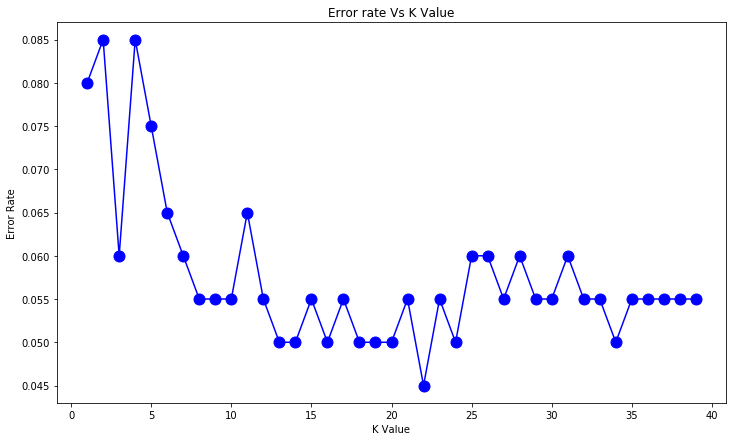

In [23]:
plt.figure(figsize = (12,7))
plt.plot(range(1,40),error_rate,color = 'blue',marker='o',markersize=11)
plt.title('Error rate Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[99  7]
 [ 9 85]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.93       106
          1       0.92      0.90      0.91        94

avg / total       0.92      0.92      0.92       200



In [25]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[102   4]
 [  5  89]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       106
          1       0.96      0.95      0.95        94

avg / total       0.96      0.95      0.95       200

